# Data visualization_v9

In [174]:
import pandas as pd
import numpy as np
import datetime as dt

In [175]:
import matplotlib.pyplot as plt
import yfinance as yf

In [176]:
data = yf.download('^HSI','2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [177]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609,1666316400
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375,1481291700
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297,1708572100
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219,1447090300
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219,1578205700


In [178]:
data["Date"]=data.index

In [179]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609,1666316400,2019-01-02
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375,1481291700,2019-01-03
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297,1708572100,2019-01-04
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219,1447090300,2019-01-07
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219,1578205700,2019-01-08


In [180]:
# rearrange the table
data=data[["Date","Open","High","Low","Close","Volume"]]

In [181]:
data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-02,2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,1666316400
2019-01-03,2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,1481291700
2019-01-04,2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,1708572100
2019-01-07,2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,1447090300
2019-01-08,2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,1578205700


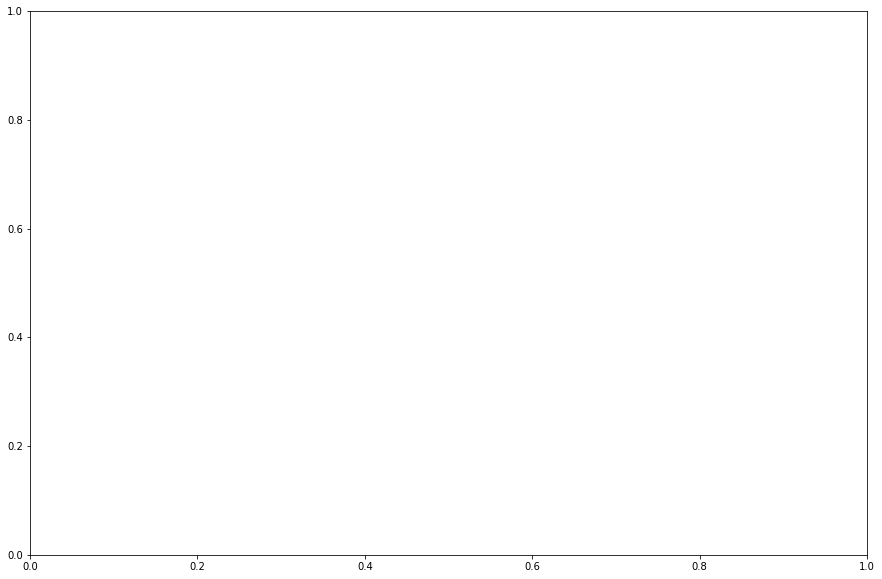

In [182]:
f1, ax = plt.subplots(figsize = (15,10))

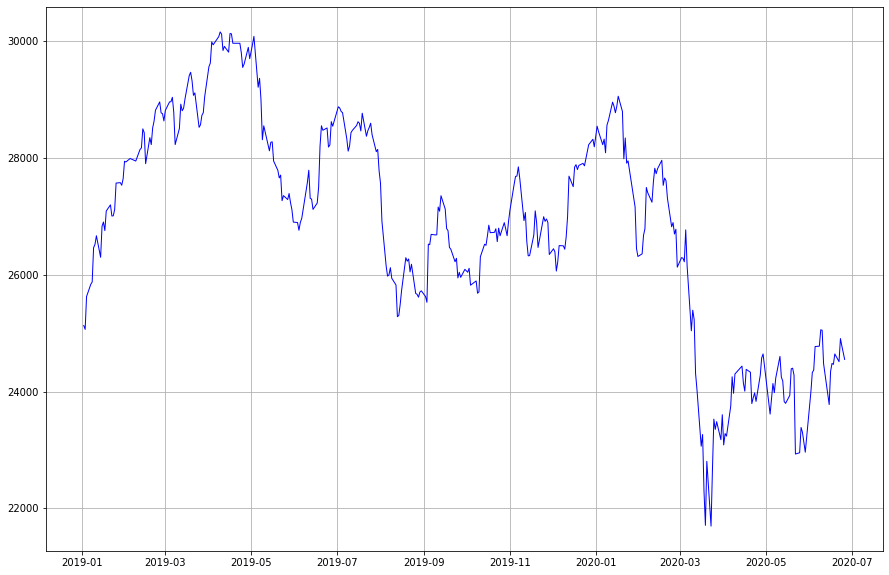

In [183]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax.grid(True)
plt.show()

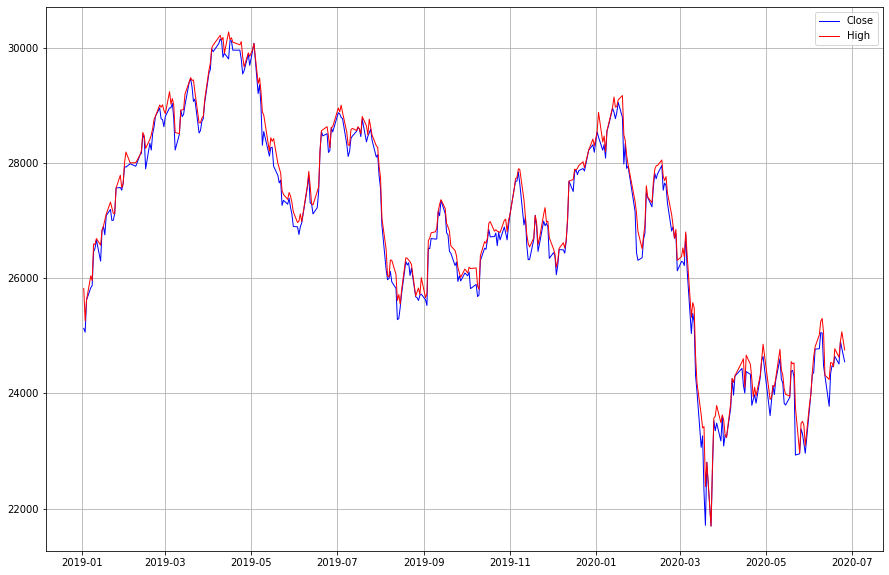

In [184]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax.plot(data["Date"],data["High"],color="red",label="High",linewidth=1)
ax.grid(True)
ax.legend()
plt.show()

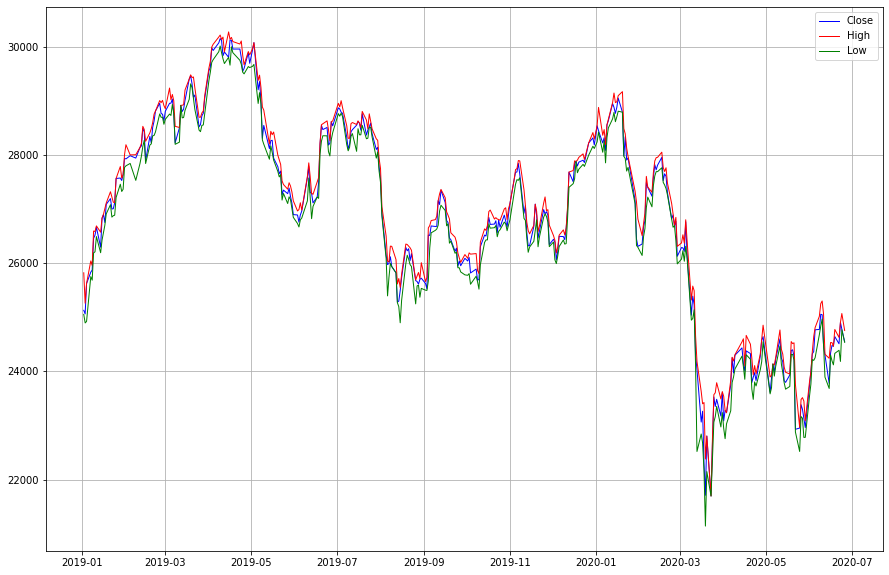

In [185]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax.plot(data["Date"],data["High"],color="red",label="High",linewidth=1)
ax.plot(data["Date"],data["Low"],color="green",label="Low",linewidth=1)
ax.grid(True)
ax.legend()
plt.show()

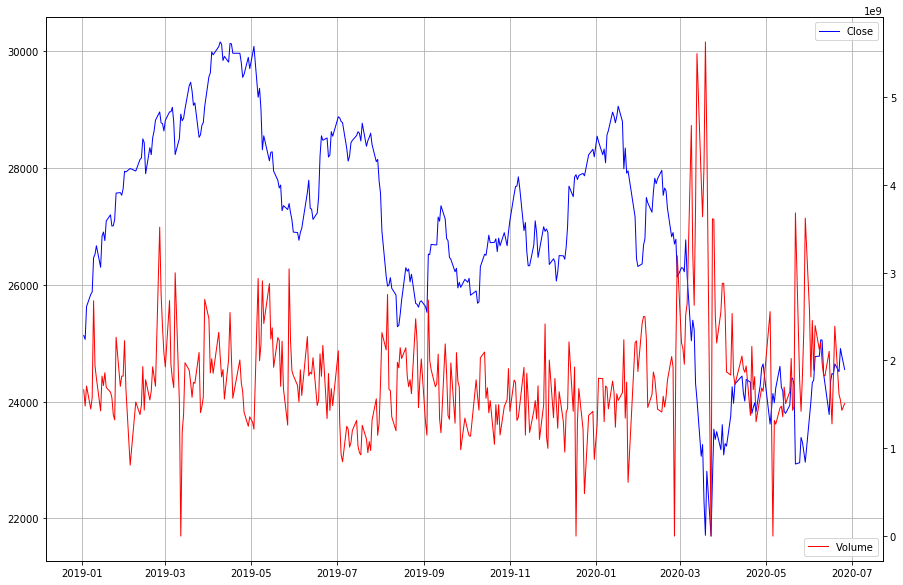

In [186]:
# ploting with different scale
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1=ax.twinx()
ax1.plot(data["Date"],data["Volume"],color="red",label="Volume",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

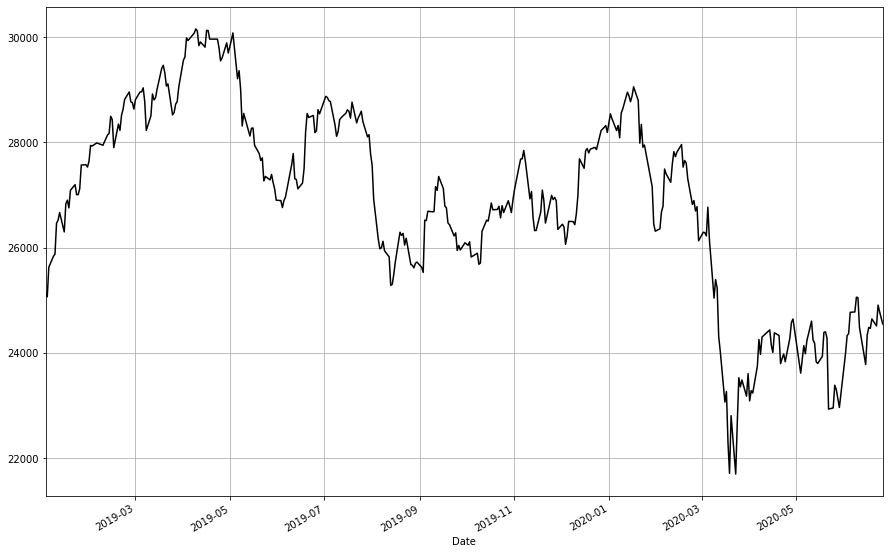

In [187]:
# other way to plot
f1, ax1 = plt.subplots(figsize = (15,10))
data["Close"].plot(kind="line",ax=ax1,color="black",label="Close",grid=True)
plt.show()

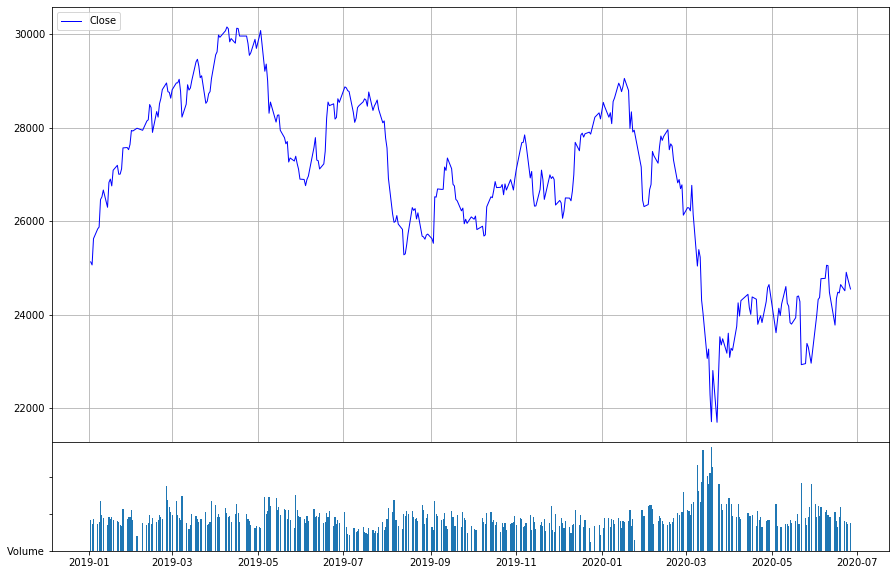

In [188]:
# first create the outer space
fig = plt.figure(figsize = (15,10))

# The subplot as 5 row, 4 column, make the first plot start as 0,0 and it conqerer 4x4 area.
ax1 = plt.subplot2grid((5,4), (0,0), rowspan=4, colspan=4)

ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)

# The subplot as 5 row, 4 column, make the second plot start as 4,0 and it conqerer 1x4 area.
ax1v = plt.subplot2grid((5,4), (4,0), sharex=ax1, rowspan=1, colspan=4)
# re-assign the tick labels 
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
# hide the plot 1 x axis label
plt.setp(ax1.get_xticklabels(), visible=False) 
# convert into bar chart
ax1v.bar(data["Date"],data["Volume"])
# stick both chart tgt
plt.subplots_adjust(hspace=0)
ax1.legend(loc="upper left")

plt.show()

## Exercise

In [189]:
data["Return"]=data["Close"]-data["Open"]

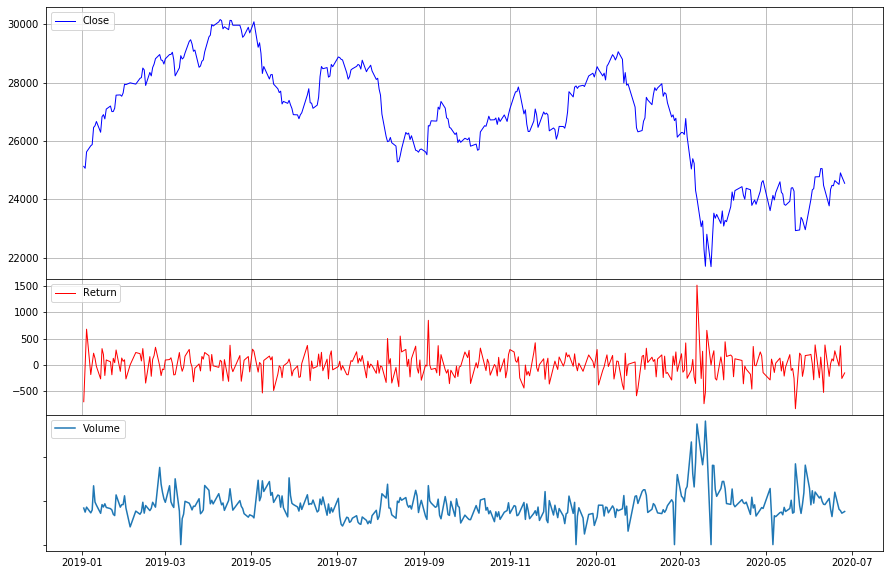

In [190]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)
ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)
ax1r.plot(data["Date"],data["Return"],color="red",label="Return",linewidth=1)
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.plot(data["Date"],data["Volume"],label="Volume")

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

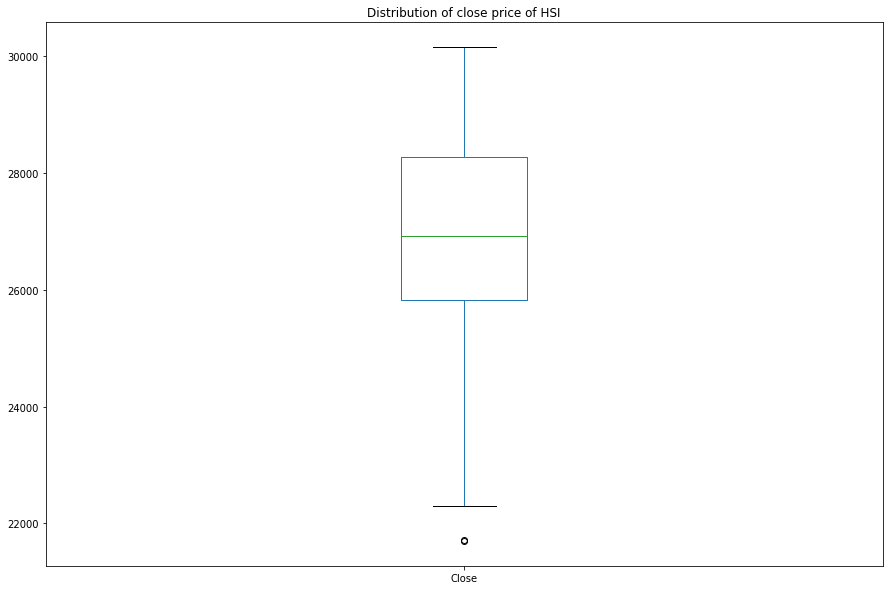

In [191]:
data["Close"].plot(kind="box",title="Distribution of close price of HSI",figsize=(15,10))
plt.show()

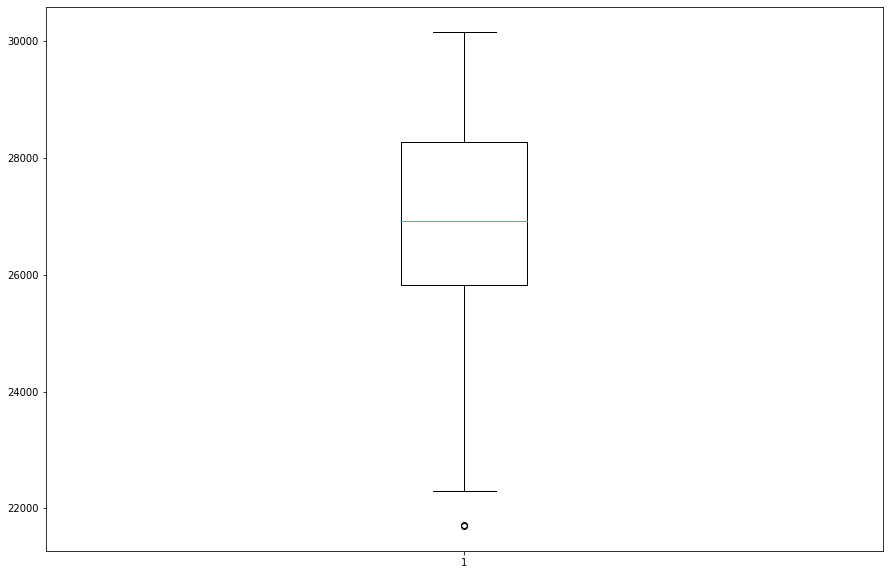

In [192]:
f1, ax = plt.subplots(figsize = (15,10))
ax.boxplot(data["Close"])
plt.show()

## Use case: To measure the volatity of the close price 

In [193]:
# percent change.
data["Close"].pct_change().head()

Date
2019-01-02         NaN
2019-01-03   -0.002626
2019-01-04    0.022409
2019-01-07    0.008182
2019-01-08    0.001539
Name: Close, dtype: float64

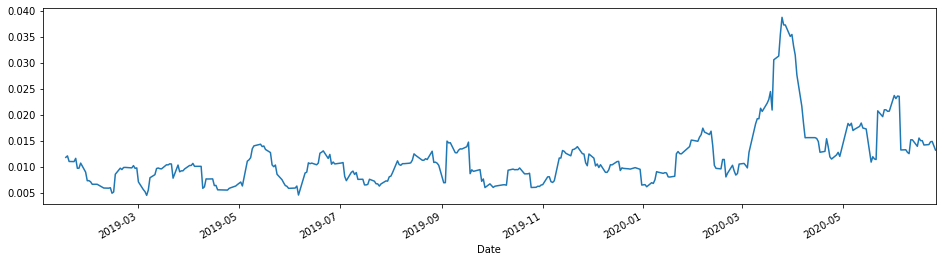

In [194]:
data["Close"].pct_change().rolling(window=10).std().plot(figsize=(16,4))
plt.show()

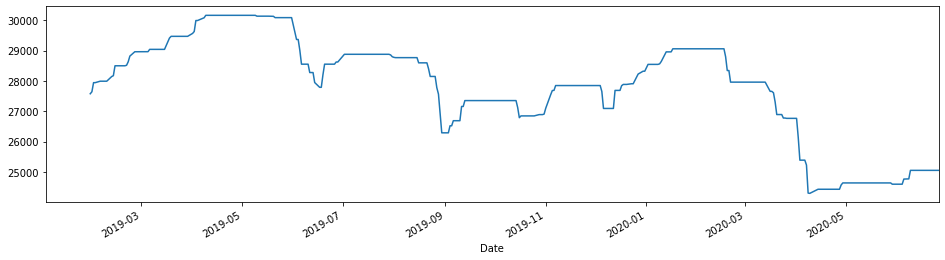

In [195]:
data["Close"].rolling(window=20).max().plot(figsize=(16,4))
plt.show()

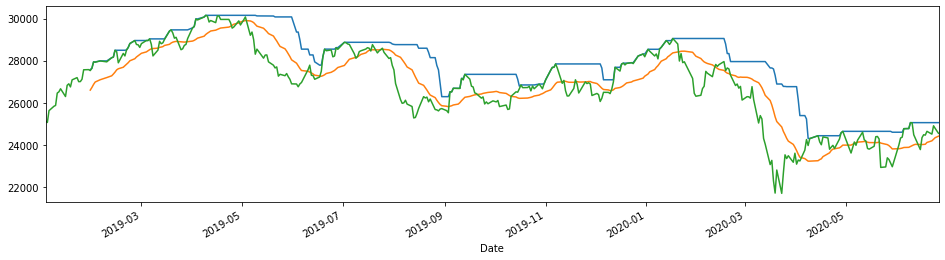

In [196]:
data["Close"].rolling(window=20).max().plot(figsize=(16,4))
data["Close"].rolling(window=20).mean().plot(figsize=(16,4))
data["Close"].plot(figsize=(16,4))
plt.show()

## Exercise

In [197]:
df_HSI=yf.download("^HSI","2019-01-01")
df_0700HK=yf.download("0700.HK","2019-01-01")
df_0939HK=yf.download("0939.HK","2019-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


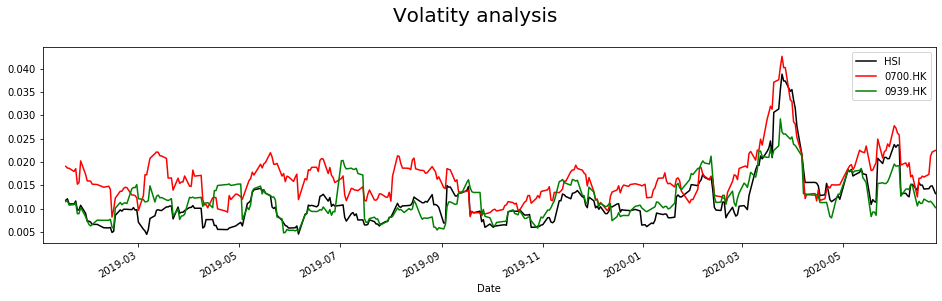

In [198]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,4))
fig.suptitle('Volatity analysis', size=20, y=1.02)
df_HSI["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="black", ax=ax1,label="HSI")
df_0700HK["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="red", ax=ax1,label="0700.HK")
df_0939HK["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="green",ax=ax1,label="0939.HK")

ax1.legend()
plt.show()

### Another example

- |
---|
Close vs Data | 
Peak vs Date + Close vs Date | 
Bottom vs Date + Close vs Date |
Volumn vs Date + Close vs Date | 

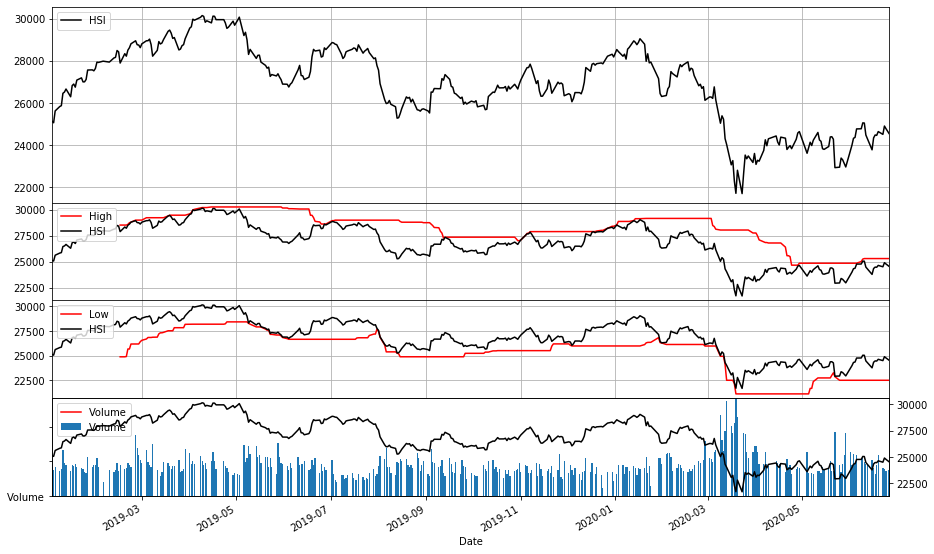

In [199]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((5,1), (0,0), rowspan=2, colspan=1)
df_HSI["Close"].plot(kind='line',color="black", ax=ax1,label="HSI")
ax1.grid(True)

ax1p = plt.subplot2grid((5,1), (2,0), rowspan=1, colspan=1)
df_HSI["High"].rolling(window=30).max().plot(kind='line',color="red", ax=ax1p,label="High")
df_HSI["Close"].plot(kind='line',color="black", ax=ax1p,label="HSI")
ax1p.grid(True)

ax1b = plt.subplot2grid((5,1), (3,0), rowspan=1, colspan=1)
df_HSI["Low"].rolling(window=30).min().plot(kind='line',color="red", ax=ax1b,label="Low")
df_HSI["Close"].plot(kind='line',color="black", ax=ax1b,label="HSI")
ax1b.grid(True)

ax1v = plt.subplot2grid((5,1), (4,0), rowspan=1, colspan=1)
df_HSI["Volume"].rolling(window=30).sum().plot(kind='line',color="red", ax=ax1v,label="Volume")
ax1vv = ax1v.twinx()
df_HSI["Close"].plot(kind='line',color="black", ax=ax1vv,label="HSI")
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data["Date"],data["Volume"],label="Volume")
ax1b.grid(True)


plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
ax1.legend(loc="upper left")
ax1b.legend(loc="upper left")
ax1v.legend(loc="upper left")
ax1p.legend(loc="upper left")

plt.show()



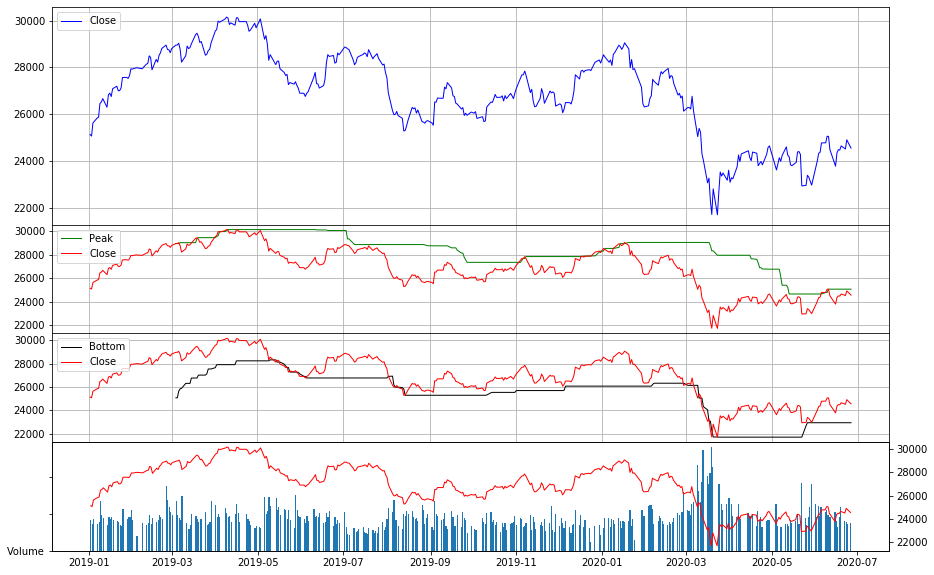

In [200]:
# Sir answer
# =============================
data["Peak"]=data["Close"].rolling(window=20).max()
data["Bottom"]=data["Close"].rolling(window=20).min()

# do not count yourself
data["Peak"]=data["Close"].shift().rolling(window=40).max()
data["Bottom"]=data["Close"].shift().rolling(window=40).min()
# =============================

fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((5,1), (0,0), rowspan=2, colspan=1)
ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)

ax1_peak = plt.subplot2grid((5,1), (2,0), rowspan=1, colspan=1)
ax1_peak.plot(data["Date"],data["Peak"],color="green",label="Peak",linewidth=1)
ax1_peak.grid(True)

ax1_peak.plot(data["Date"],data["Close"],color="red",label="Close",linewidth=1)

ax1_bottom = plt.subplot2grid((5,1), (3,0), rowspan=1, colspan=1)
ax1_bottom.plot(data["Date"],data["Bottom"],color="black",label="Bottom",linewidth=1)
ax1_bottom.grid(True)

ax1_bottom.plot(data["Date"],data["Close"],color="red",label="Close",linewidth=1)

ax1v = plt.subplot2grid((5,1), (4,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])
#ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data["Date"],data["Volume"],label="Volume")
ax2=ax1v.twinx()
ax2.plot(data["Date"],data["Close"],color="red",label="Close",linewidth=1)

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1_peak.get_xticklabels(), visible=False)
plt.setp(ax1_bottom.get_xticklabels(), visible=False)

ax1.legend(loc="upper left")
ax1_peak.legend(loc="upper left")
ax1_bottom.legend(loc="upper left")

plt.show()

## Generate candlestick charts

In [201]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
%matplotlib inline

In [202]:
ohlc= data[['Date', 'Open', 'High', 'Low','Close',"Volume"]].copy()
ohlc.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-02,2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,1666316400
2019-01-03,2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,1481291700
2019-01-04,2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,1708572100
2019-01-07,2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,1447090300
2019-01-08,2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,1578205700


In [203]:
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)

In [204]:
ohlc.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-02,737061.0,25824.439453,25824.439453,25055.269531,25130.349609,1666316400
2019-01-03,737062.0,25077.679688,25262.210938,24896.869141,25064.359375,1481291700
2019-01-04,737063.0,24946.119141,25626.029297,24924.730469,25626.029297,1708572100
2019-01-07,737066.0,26015.839844,26043.640625,25753.460938,25835.699219,1447090300
2019-01-08,737067.0,25852.500000,25960.890625,25688.500000,25875.449219,1578205700


In [205]:
ohlc= data[['Date', 'Open', 'High', 'Low','Close',"Volume"]].copy()
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)

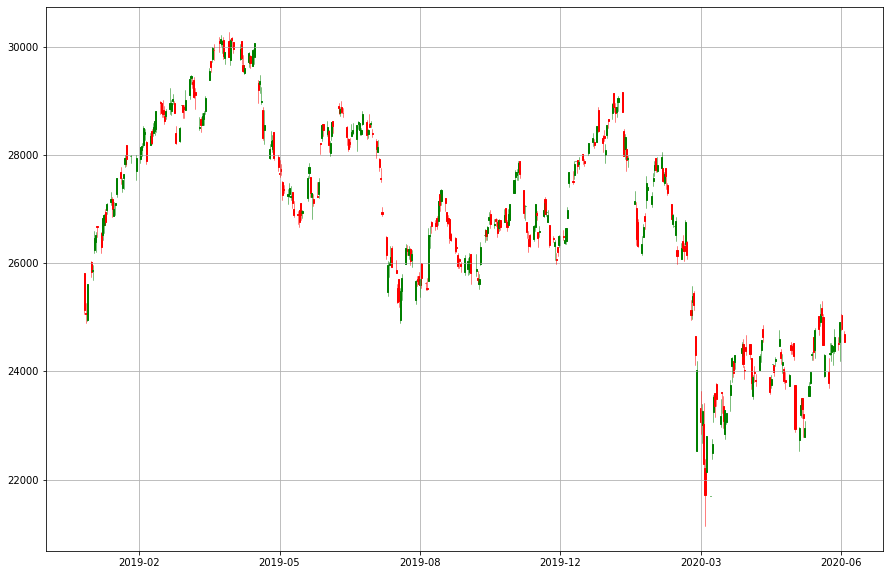

In [206]:
f1, ax = plt.subplots(figsize = (15,10))

candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)

plt.show()

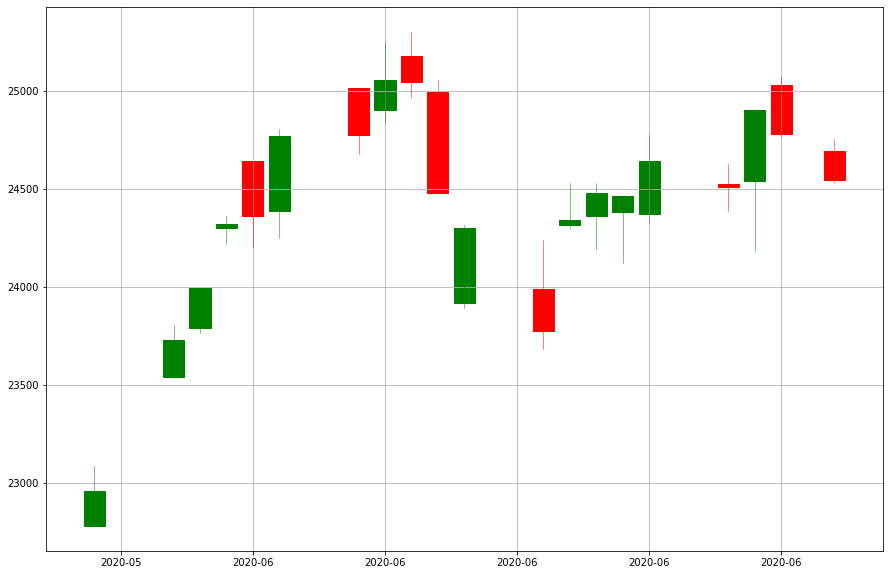

In [207]:
f1, ax = plt.subplots(figsize = (15,10))

candlestick_ohlc(ax, ohlc.loc["2020-05-29":].values, width=0.8, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)

plt.show()

In [208]:
ohlc.values

array([[7.37061000e+05, 2.58244395e+04, 2.58244395e+04, 2.50552695e+04,
        2.51303496e+04, 1.66631640e+09],
       [7.37062000e+05, 2.50776797e+04, 2.52622109e+04, 2.48968691e+04,
        2.50643594e+04, 1.48129170e+09],
       [7.37063000e+05, 2.49461191e+04, 2.56260293e+04, 2.49247305e+04,
        2.56260293e+04, 1.70857210e+09],
       ...,
       [7.37599000e+05, 2.45414395e+04, 2.49073398e+04, 2.41848809e+04,
        2.49073398e+04, 1.54905370e+09],
       [7.37600000e+05, 2.50348691e+04, 2.50713203e+04, 2.47709492e+04,
        2.47815801e+04, 1.43191370e+09],
       [7.37602000e+05, 2.46979805e+04, 2.47565801e+04, 2.45377695e+04,
        2.45499902e+04, 1.50926010e+09]])

### Another example

In [209]:
data["Volatity"]=data["Close"].pct_change().rolling(window=10).std()

In [210]:
data1=data[["Date","Open","High","Low","Close","Volume","Volatity"]].loc["2019-01-01":"2019-03-01"].copy()
ohlc=data1.copy()
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)


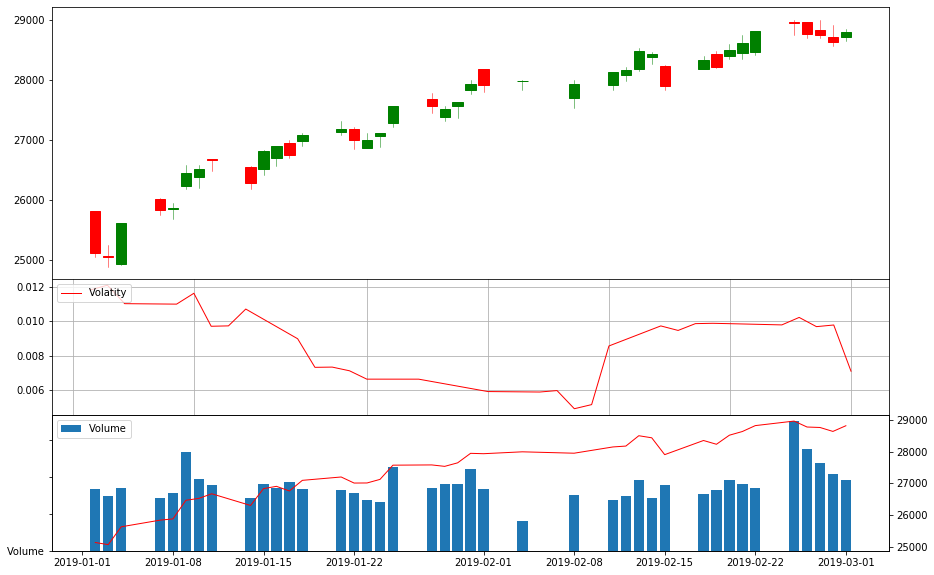

In [211]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)
candlestick_ohlc(ax1, ohlc.values, width=0.8, colorup='green', colordown='red')

#ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
#ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)
ax1r.plot(data1["Date"],data1["Volatity"],color="red",label="Volatity",linewidth=1)
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data1["Date"],data1["Volume"],label="Volume")
ax2=ax1v.twinx()
ax2.plot(data1["Date"],data1["Close"],color="red",label="Close",linewidth=1)

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
#ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

In [212]:
from mpl_finance import candlestick2_ohlc

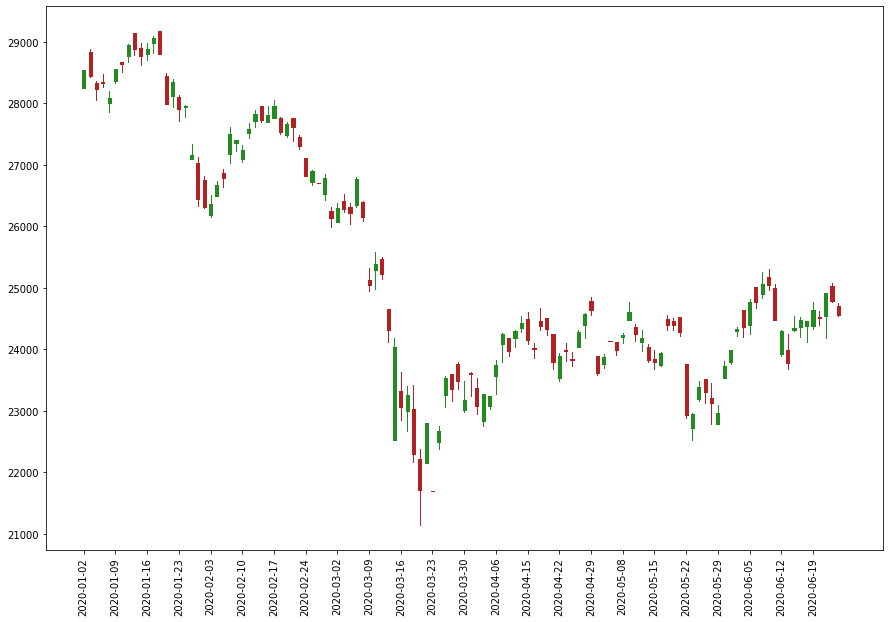

In [213]:
data=data.loc["2020-01-01":].copy()
f1, ax4 = plt.subplots(figsize = (15,10))

# convert the index
ax4.set_xticks(range(0, len(data.index), 5))
ax4.set_xticklabels(data.index[::5].strftime("%Y-%m-%d"))

candlestick2_ohlc(ax4, opens=data["Open"], highs=data["High"], lows=data["Low"], closes=data["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
plt.xticks(rotation=90)
plt.show()

### Exercise 

In [214]:
# seperate notebook

## Correlation analysis

## Example-plotting Dollar index, gold and HSI

In [215]:
df_dollar=yf.download("DX-Y.NYB","2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [216]:
df_dollar.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-22,97.660004,97.739998,97.010002,97.040001,97.040001,0
2020-06-23,96.930000,97.250000,96.389999,96.690002,96.690002,0
2020-06-24,96.660004,97.239998,96.550003,97.150002,97.150002,0
2020-06-25,97.239998,97.599998,97.160004,97.430000,97.430000,0
2020-06-26,97.349998,97.680000,97.260002,97.500000,97.500000,0


In [217]:
df_dollar["Date"]=df_dollar.index

In [218]:
df_gold=yf.download("GC=F","2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [219]:
#df_gold=yf.download("2840.HK","2019-01-01")
df_gold["Date"]=df_gold.index

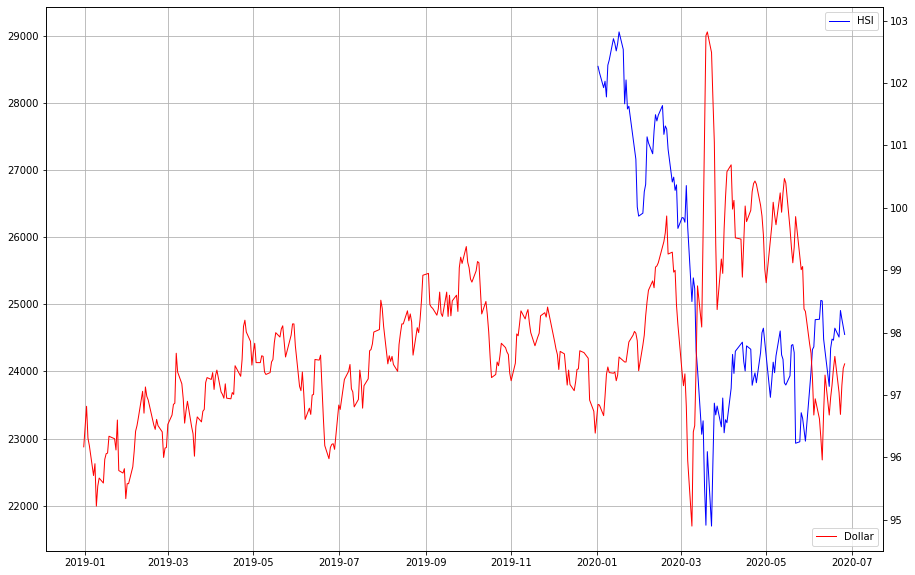

In [220]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="HSI",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_dollar["Date"],df_dollar["Close"],color="red",label="Dollar",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

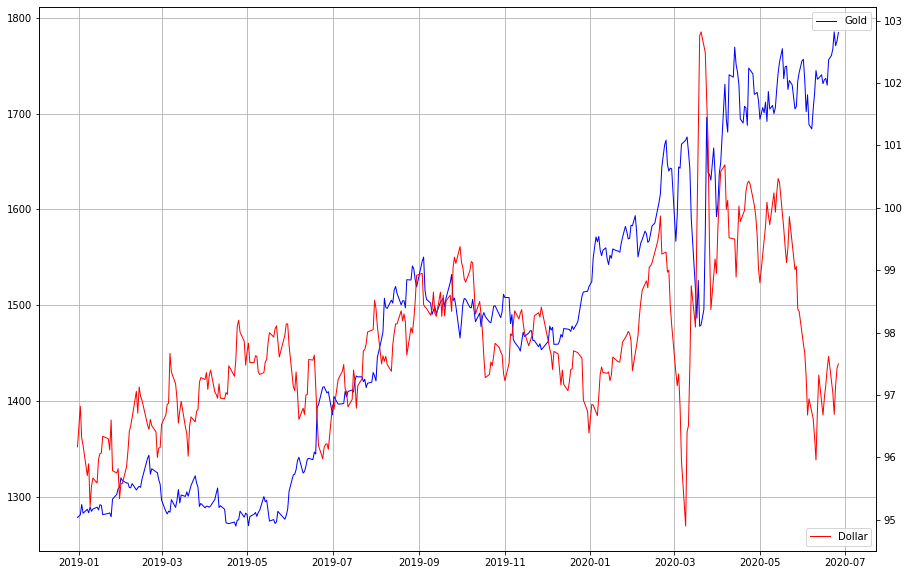

In [221]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(df_gold["Date"],df_gold["Close"],color="blue",label="Gold",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_dollar["Date"],df_dollar["Close"],color="red",label="Dollar",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

In [222]:
from scipy import stats

In [223]:
df_dollar.shape

(373, 7)

In [224]:
data.shape

(120, 10)

In [225]:
df_dollar.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2018-12-31,96.400002,96.510002,96.070000,96.169998,96.169998,0,2018-12-31
2019-01-02,96.139999,96.959999,95.820000,96.820000,96.820000,0,2019-01-02
2019-01-03,96.720001,96.750000,96.209999,96.309998,96.309998,0,2019-01-03
2019-01-04,96.279999,96.610001,96.050003,96.190002,96.190002,0,2019-01-04
2019-01-07,96.160004,96.160004,95.639999,95.709999,95.709999,0,2019-01-07


In [226]:
df_dollar.index.difference(data.index)

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31',
               '2020-01-27', '2020-01-28', '2020-04-13', '2020-04-30',
               '2020-05-01', '2020-06-25'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [227]:
data.index.difference(df_dollar.index)

DatetimeIndex(['2020-01-20', '2020-02-17', '2020-05-25'], dtype='datetime64[ns]', name='Date', freq=None)

In [228]:
L1=[i for i in df_dollar.index.tolist() if i not in df_dollar.index.difference(data.index)]

In [229]:
L2=[i for i in data.index.tolist() if i not in data.index.difference(df_dollar.index)]

In [230]:
data=data.loc[L2].copy()

In [231]:
df_dollar=df_dollar.loc[L1].copy()

In [232]:
# co-relation , -0.49 mean that it is highly corelated session, 1.63e-08 is confidence interval
stats.pearsonr(data["Close"],df_dollar["Close"])

(-0.4929636962654708, 1.6387762486059366e-08)